# Introduction

Consider the problem of maximizing a _concave_ function $f(\mathbf{x})$ of _multiple_ variables $\mathbf{x}=(x_1,x_2,\ldots,x_n)$ where there are no constraints on the feasible values. A number of search procedures are available for solving such a problem numerically. One of these, the _gradient search procedure_, is an especially important one because it identifies and uses the direction of movement from the current trial solution that maximizes the rate at which $f(\mathbf{x})$ is increased.

# 3D Plotting and Typesetting

The following will initialize the notebook, define a typesetting for plotting, and a function `plot3d` that creates plots in 3D.

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from numpy import *
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d
from sympy import symbols, diff, solve, Matrix
font = {'size': 14}
matplotlib.rc('font', **font)

In [3]:
class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

In [4]:
def plot3d(f,lim=(-5,5),title='Surface plot',detail=0.05,path=[]):
    fig = plt.figure(figsize=(16,12))
    ax = fig.add_subplot(111, projection='3d')
    xs = ys = np.arange(lim[0],lim[1], detail)
    X, Y = np.meshgrid(xs, ys)
    zs = np.array([f(x, y) for x, y in zip(np.ravel(X), np.ravel(Y))])
    Z = zs.reshape(X.shape)
    surf = ax.plot_surface(X, Y, Z, cmap=cm.Blues)
    fig.colorbar(surf, shrink=0.5, aspect=5)
    xlabel('X-axis');ylabel('Y-axis');ax.set_zlabel('Z-axis')
    plt.title(title);
    if len(path):
        xs, ys, zs = path[0], path[1], path[2]
        ax.plot(xs,ys,zs, 'o', color='r', markersize=5, zorder=3)
        for i in range(len(xs)-1):
            ax.add_artist(Arrow3D([xs[i], xs[(i+1)%len(xs)]], 
                                  [ys[i], ys[(i+1)%len(xs)]], 
                                  [zs[i], zs[(i+1)%len(xs)]],
                                  mutation_scale=15, lw=2, arrowstyle="-|>", 
                                  color='r', zorder=4)) 
    return fig, ax

# Convexity/Concavity Tests

The following function calculates the Hessian for a function $f(\mathbf{x})$ to determine if it is convex.

In [5]:
def hessian(f):
    x, y = symbols('x y')
    f = f(x,y)
    pf_px = f.diff(x)
    pf_py = f.diff(y)
    p2f_pxpy = pf_px.diff(y)
    return Matrix([[pf_px.diff(x), p2f_pxpy], [p2f_pxpy, pf_py.diff(y)]])

If the determinant of the Hessian is positive and $\dfrac{\partial f}{\partial x \partial y}$ is also positive, the function is convex.

In [6]:
def is_convex(f):
    H = hessian(f)
    return H.det() > 0 and H[0,0] > 0

If the determinant of the Hessian is positive and $\dfrac{\partial f}{\partial x \partial y}$ is negative, the function is concave.

In [7]:
def is_concave(f):
    H = hessian(f)
    return H.det() > 0 and H[0,0] < 0

# The Gradient Search Procedure

For a single variable function, there are only two possible directions (increase $x$ or decrease $x$) in which to move from the current trial solution to the next one. The goal was to reach a point where eventually the derivative is (essentially) $0$. Now, there are _innumerable_ possible directions in which to move; they correspond to the possible _proportional rates_ at which the respective variables can be changed. The goal is to reach a point eventually where all the partial derivates are (essentially) $0$.

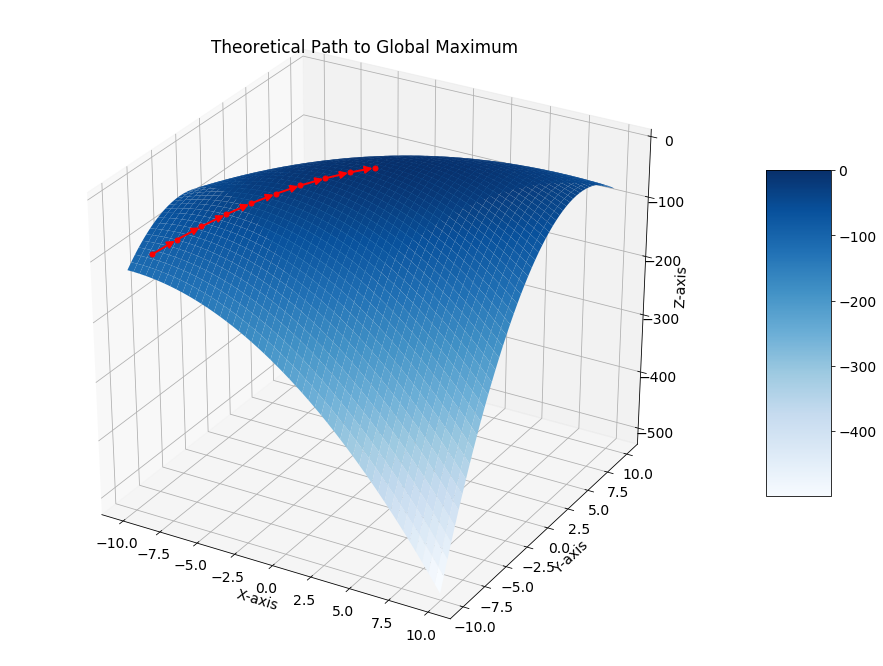

In [8]:
n = 10
f = lambda x,y: 2*x*y + 2*y - x**2 - 2*y**2
xs = np.linspace(-9,0,n)
ys = np.linspace(-9,0,n)
zs = f(xs,ys)
plot3d(f, lim=(-10,10), path=[xs,ys,zs], 
       title='Theoretical Path to Global Maximum');

Because the objective function $f(\mathbf{x})$ is assumed to be differentiable, it possesses a gradient, denoted by $\nabla f(\mathbf{x})$, at each point $\mathbf{x}$. In particular, the **gradient** at a specific point $\mathbf{x}=\mathbf{x}'$ is the _vector_ whose elements are the respective _partial derivatives_ evaluated at $\mathbf{x}=\mathbf{x}'$, so that:

$$ \nabla f(\mathbf{x}') = \left( \dfrac{\partial f}{\partial x_1}, \dfrac{\partial f}{\partial x_2}, \ldots, \dfrac{\partial f}{\partial x_n} \right) \quad \textrm{at } \mathbf{x}=\mathbf{x}'.$$

The significance of the gradient is that the (infinitesimal) change in $\mathbf{x}$ that _maximizes_ the rate at which $f(\mathbf{x})$ increases is the change _proportional_ to $\nabla f(\mathbf{x})$. It may be said that the rate at which $f(\mathbf{x})$ increases is maximized if (infinitesimal) changes in $\mathbf{x}$ are in the _direction_ of the gradient $\nabla f(\mathbf{x})$. Because the current problem has no constraints, this interpretation of the gradient suggests that an efficient search procedure should keep moving in the direction of the gradient until it (essentially) reaches an optimal solution $\mathbf{x}^*$, where $\nabla f(\mathbf{x}^*)=0$.

# Summary of the Gradient Search Procedure

> Add a summary of the gradient search procedure.

# Example

Consider the following two-variable problem:

$$ \max f(\mathbf{x}) = 2xy + 2y -x^2 -2y^2 $$

In [9]:
f = lambda x,y: 2*x*y + 2*y - x**2 - 2*y**2
lim=(-2,2)

Let's take a look at a surface plot of $f(\mathbf{x})$:

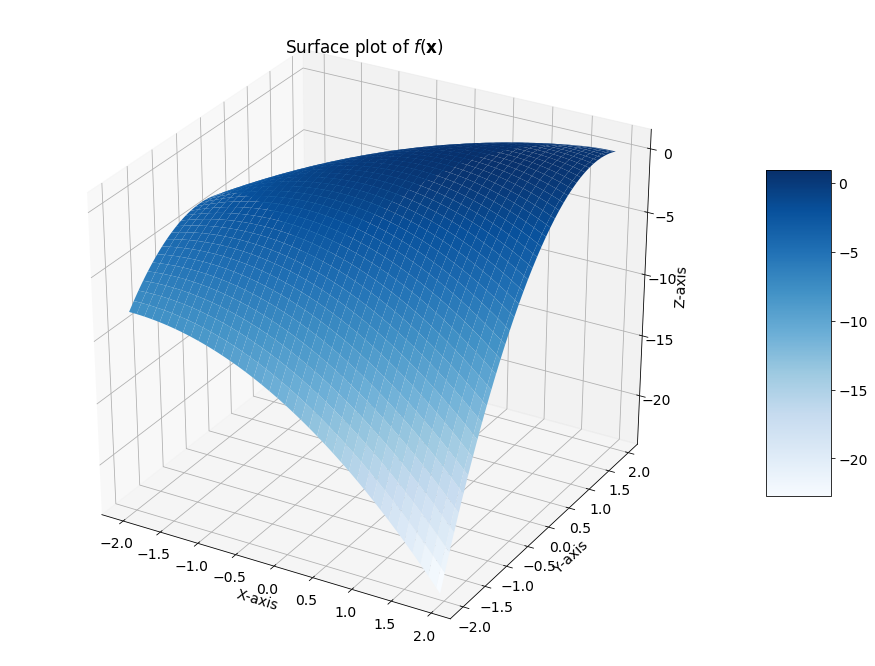

In [10]:
plot3d(f, lim=lim, title='Surface plot of $f(\\mathbf{x})$');

First we will check if $f(\mathbf{x})$ is a concave function, for $f(\mathbf{x})$ to be concave, the determinant of the Hessian of $f(\mathbf{x})$ should be positive, and any second-order partial derivate $f(\mathbf{x})_{xy}$ or $f(\mathbf{x})_{yx}$ must be negative.

In [11]:
hessian(f)

Matrix([
[-2,  2],
[ 2, -4]])

In [12]:
is_concave(f)

True

From $f(\mathbf{x})$ we can find that $\dfrac{\partial f}{\partial x} = 2y - 2x$ and $\dfrac{\partial f}{\partial y} = 2x + 2 - 4y$. This gives us the gradient $\nabla f(\mathbf{x})$:

In [13]:
grad = lambda x: np.array([2*x[1] - 2*x[0], 
                           2*x[0] + 2 - 4*x[1]]) # gradient of f

xp = np.array([0, 0]) # trial solution

To begin the gradient search procedure, after choosing a suitably small value of $\epsilon$ (normally well under $0.1$) suppose that $\mathbf{x}=(0,0)$ is selected as the initial trial solution.

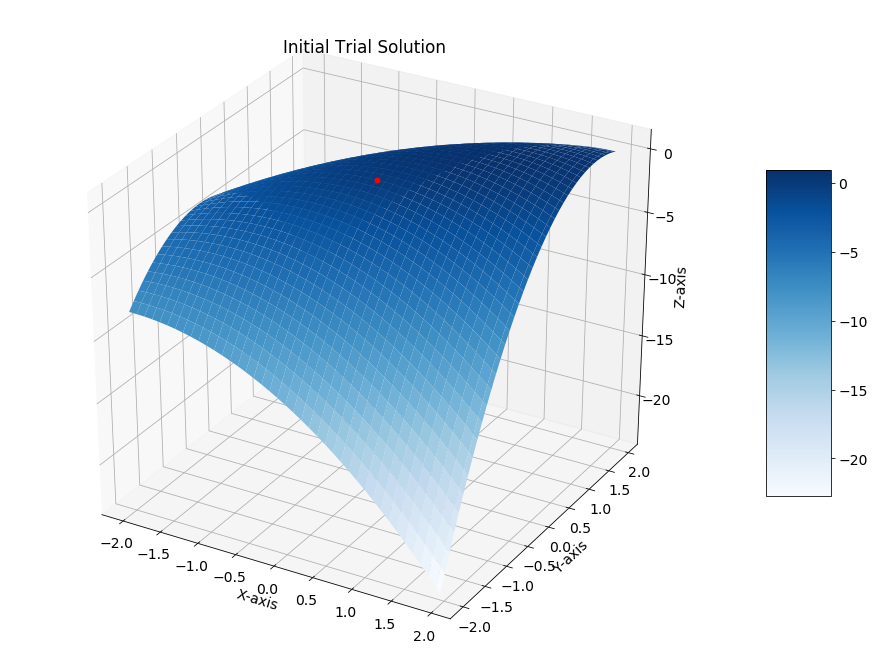

In [14]:
plot3d(f, lim=lim, path=[[0],[0],[f(0,0)]], 
       title='Initial Trial Solution');

Because the respective partial derivatives are $0$ and $2$ at this point, the gradient is $\nabla f(0,0) = (0,2)$. With $\epsilon < 2$, the stopping rule then says to perform an iteration.

In [15]:
grad([0,0])

array([0, 2])

**Iteration 1:** With values of $0$ and $2$ for the respective partial derivatives, the first iteration begins by setting:

$$ x = 0 + t(0) = 0 \\ y = 0 + t(2) = 2t $$

and then substituting these expressions into $f(\mathbf{x})$ to obtain

$$ f(\mathbf{x}' + t \nabla f(\mathbf{x}')) = f(0, 2t) = 4t - 8t^2.$$

Now we need to find a maximum in a function of one-variable, we can do this by differentiating $4t - 8t^2$ which is $4-16t$, from this it follows that $t^*=\dfrac{1}{4}$, so we reset: $\mathbf{x}'=(0,0) + \dfrac{1}{4}(0,2)=(0,\dfrac{1}{2})$. This completes the iteration. For this new trial solution, the gradient is $\nabla f\left(0,\dfrac{1}{2}\right)=(1,0)$.

x=[0.  0.5] with gradient ([1. 0.])


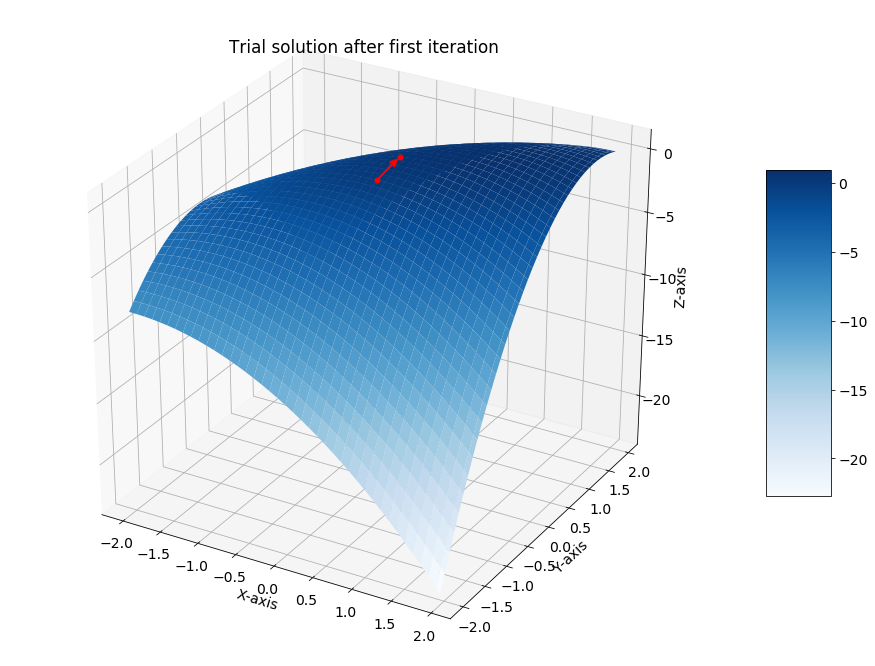

In [16]:
xp = xp + (1/4) * grad(xp)
print('x={} with gradient ({})'.format(xp, grad(xp)))
plot3d(f, lim=lim, path=[[0, 0],[0, 1/2],[f(0,0),f(0,1/2)]], 
       title='Trial solution after first iteration');

With $\epsilon < 1$, the stopping rule now says to perform another iteration.

**Iteration 2**: This time we will do the iteration with help of _SymPy_:

In [17]:
t = symbols('t') # define a symbol t
u = grad(xp) * t + xp # find gradient vector
u

array([1.0*t, 0.500000000000000], dtype=object)

In [18]:
solve(f(u[0], u[1]).diff()) # substitute the gradient vector into f(x), 
                            # then differentiate and solve for t (max. point).

[0.500000000000000]

So $t^* = \dfrac{1}{2}$

x=[0.5 0.5] with gradient ([0. 1.])


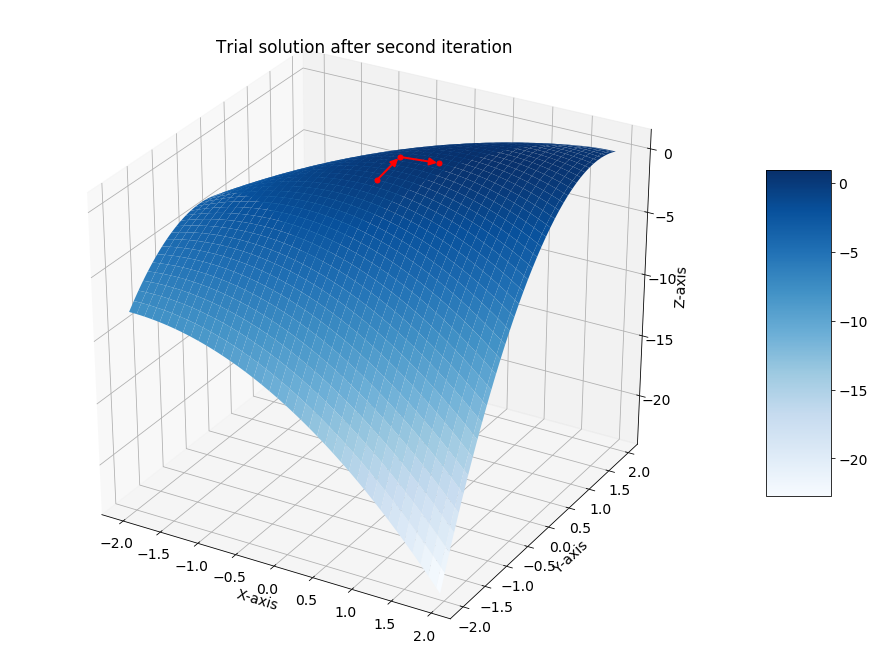

In [19]:
xp = xp + (1/2) * grad(xp)
print('x={} with gradient ({})'.format(xp, grad(xp)))
plot3d(f, lim=lim, path=[[0, 0, .5],[0, 1/2, .5],
                         [f(0,0),f(0,1/2),f(.5,.5)]], 
       title='Trial solution after second iteration');

This completed the second iteration. With a typically small value of $\epsilon$, the procedure would now continue on to several more iterations in similar fashion. If we find the maximum analytically, we find that optimal value is at $(1,1)$:

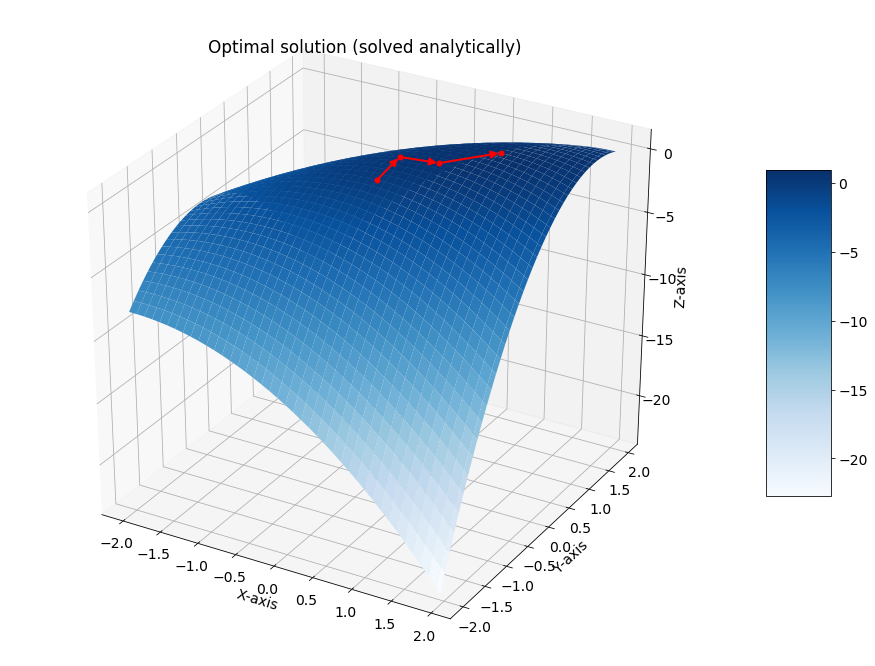

In [20]:
plot3d(f, lim=lim, path=[[0, 0, .5, 1],[0, 1/2, .5, 1],
                         [f(0,0),f(0,1/2),f(.5,.5),f(1,1)]], 
       title='Optimal solution (solved analytically)');

# Algorithm implementation

The following implementation of the gradient search procedure will find the optimum, assuming that the Hessian only consists of constants, and that $f$ is concave.

## Optimal Step Size

The optimal movement algorithm will substitute the direction vector into $f$ to find the maximum length of the path to travel towards. This requires SymPy, because it will substitute, differentiate, and solve. As a result, this algorithm is more efficient than the fixed movement algorithm, however, this uses expensive analytical solutions to coverge towards the optimum.

Gradient Search Procedure required 5 iterations.


(<Figure size 1152x864 with 2 Axes>,
 <matplotlib.axes._subplots.Axes3DSubplot at 0x262e5e37ef0>)

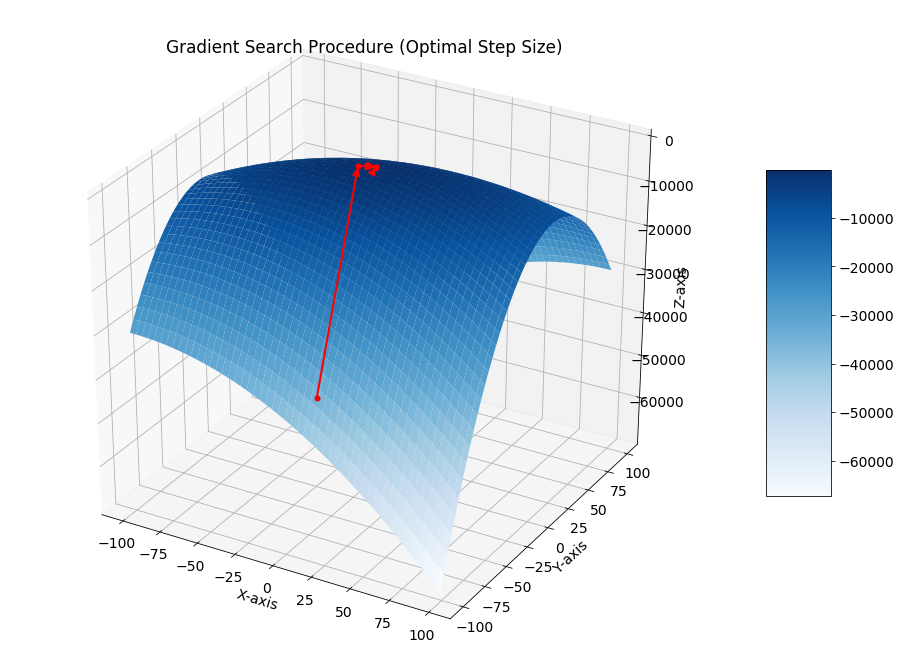

In [90]:
# function with powers higher than two are not supported.
f = lambda x1,x2: 2*x1*x2 + 2*x2 - x1**2 - 4*x2**2
#f = lambda x,y: x**2+5*y**2+x**2*y+2*y**2

# check if the hessian is positive.
#if hessian(f).det() < 0: raise ValueError('negative hessian!')
    
# create a sympy equation from f
x, y, t = symbols('x y t')
f_alg = f(x,y)

# plot limit
lim = (-100,100)

# max error
eps = 0.01

# initial trial solution x'
xp = np.array([15, -90])

# stores the path (xyz values) to plot
xs = [xp[0]]; ys = [xp[1]]; zs =[f(xp[0], xp[1])]

# get partial derivatives for calculating the gradient
grad = np.array([f_alg.diff(x), f_alg.diff(y)])

# calculate the gradient vector at x'
u = np.array([g.subs(x,xp[0]).subs(y,xp[1]) for g in grad])

# in case it takes forever
bail = 100

# keep iterating while the partials are not (near) zero.
while (abs(u[0]) > eps or abs(u[1]) > eps) and bail > 0:
    
    d = xp + t * u # multiply t into the gradient vector
    tp = solve(f(d[0], d[1]).diff(t))[0].evalf() # substitute the 
                                                 # gradient vector
                                                 # into f, diff, and
                                                 # solve for t.
    xp = xp + tp*u  # set x' to the new x'
    
    # append path for plotting
    xs.append(xp[0]); ys.append(xp[1]); zs.append(f(xp[0], xp[1]))
    
    # calculate the gradient at x'
    u = np.array([g.subs(x,xp[0]).subs(y,xp[1]) for g in grad])
    
    bail -= 1 # in case it takes forever

# force casting to float64
xs = np.array(xs, dtype='float64')
ys = np.array(ys, dtype='float64')
zs = np.array(zs, dtype='float64')

print('Gradient Search Procedure required {} iterations.'.format(len(xs)))

# plot as a surface with the path
plot3d(f, lim=lim, path=[xs,ys,zs], 
       title='Gradient Search Procedure (Optimal Step Size)', detail=1)

## Fixed Step Size

Instead of deriving an analytical solution to maximize the direction in which we move, this movement is a fixed value. Using the fixed value algorithm, makes it easier to implement in other programming languages where an CAS system is not available. This will require to calculate the gradient $\nabla f(\mathbf{x})$ by hand. In this example, the gradient is still being found with Sympy.

Gradient Search Procedure required 124 iterations.


(<Figure size 1152x864 with 2 Axes>,
 <matplotlib.axes._subplots.Axes3DSubplot at 0x262e56447b8>)

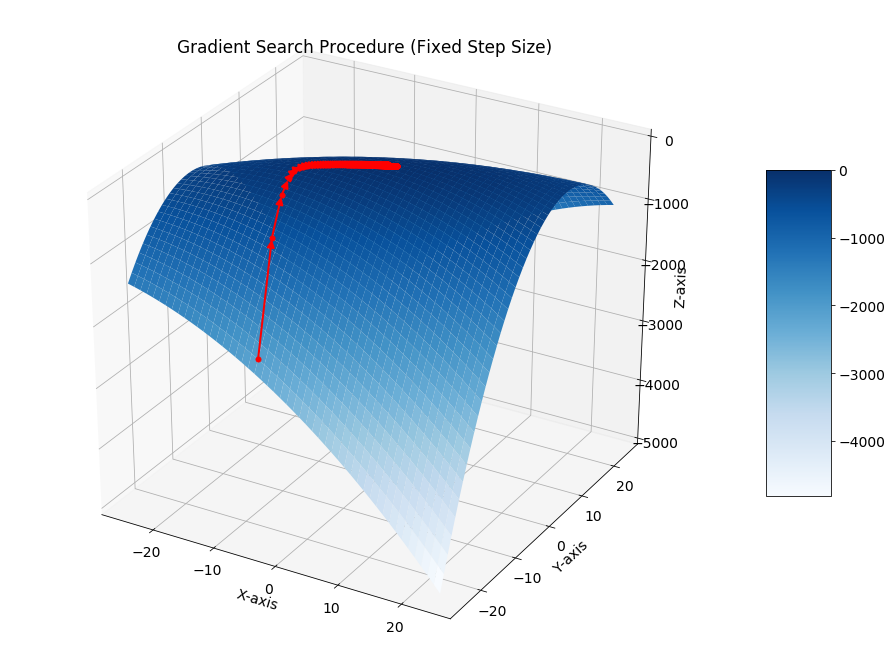

In [89]:
# function with powers higher than two are not supported.
f = lambda x1,x2: 3*x1*x2 + 5*x2 - x1**2 - 4*x2**2

# create a sympy equation from f
x, y, t = symbols('x y t')
f_alg = f(x,y)

# plot limit
lim = (-25,25)

# max error
eps = 0.1

# step size
step = eps/2

# initial trial solution x'
xp = np.array([-5, -24])

# stores the path (xyz values) to plot
xs = [xp[0]]; ys = [xp[1]]; zs =[f(xp[0], xp[1])]

# get partial derivatives for calculating the gradient
grad = np.array([f_alg.diff(x), f_alg.diff(y)])

# calculate the gradient vector at x'
u = np.array([g.subs(x,xp[0]).subs(y,xp[1]) for g in grad])

# in case it takes forever
bail = 200

# keep iterating while the partials are not (near) zero.
while (abs(u[0]) > eps or abs(u[1]) > eps) and bail > 0:
    
    xp = xp + step*u  # set x' to the new x'
    
    # append path for plotting
    xs.append(xp[0]); ys.append(xp[1]); zs.append(f(xp[0], xp[1]))
    
    # calculate the gradient at x'
    u = np.array([g.subs(x,xp[0]).subs(y,xp[1]) for g in grad])
    
    bail -= 1 # in case it takes forever

# force casting to float64
xs = np.array(xs, dtype='float64')
ys = np.array(ys, dtype='float64')
zs = np.array(zs, dtype='float64')

print('Gradient Search Procedure required {} iterations.'.format(len(xs)))

# plot as a surface with the path
plot3d(f, lim=lim, path=[xs,ys,zs], 
       title='Gradient Search Procedure (Fixed Step Size)', detail=1)

# References

[1] Multivariable unconstrained optimization, _Introduction to Operations Research_, 10th ed., Hillier and Lieberman.

# Appendix: SymPy Testing

In [22]:
from sympy import symbols, diff, solve, Matrix
from sympy import diff
from sympy import solve
from sympy import Matrix

In [23]:
x,y,z,t = symbols('x y z t')

In [24]:
expr = f(t, t)
expr 

-3*t**2 + 2*t

In [25]:
a = 2*t - t**2
a > 0

-t**2 + 2*t > 0

In [26]:
expr.subs(t, 1)

-1

In [27]:
d_dt = diff(expr)
d_dt

-6*t + 2

In [28]:
solve(d_dt, t)

[1/3]

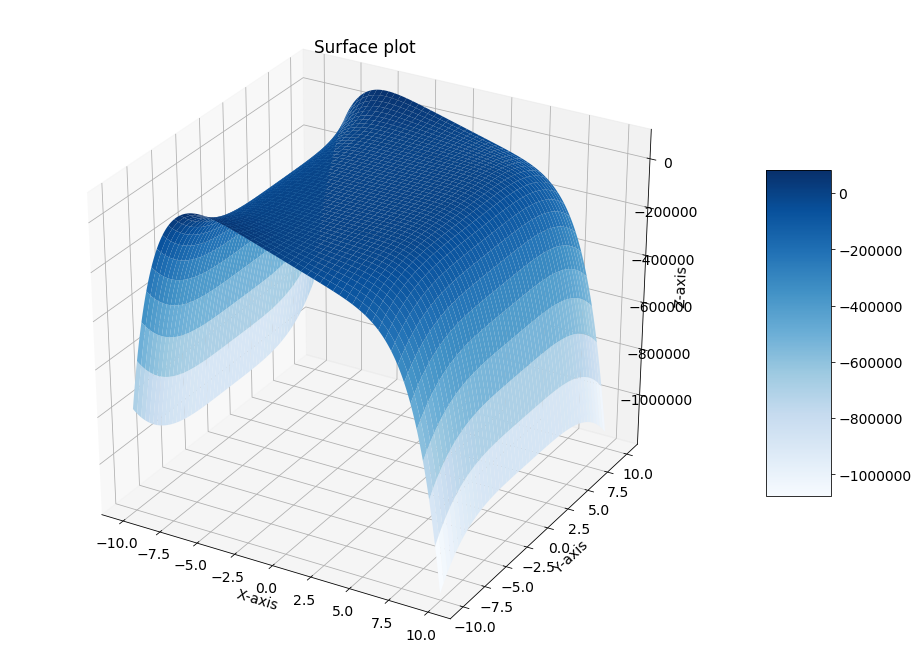

In [29]:
plot3d(lambda x,y: 2*x*y**3 + 2*y**3 - x**6 - 2*y**4*x, lim=(-10,10));

In [30]:
f = 2*x*y**3 + 2*y**3 - x**6 - 2*y**4*x
diff(f, x)

-6*x**5 - 2*y**4 + 2*y**3

In [31]:
type(f)

sympy.core.add.Add

In [32]:
diff(f, y)

-8*x*y**3 + 6*x*y**2 + 6*y**2

In [33]:
def hessian(f):
    x, y = symbols('x y')
    f = f(x,y)
    pf_px = f.diff(x)
    pf_py = f.diff(y)
    p2f_pxpy = pf_px.diff(y)
    return Matrix([[pf_px.diff(x), p2f_pxpy], [p2f_pxpy, pf_py.diff(y)]])

In [34]:
x

x

In [35]:
f = lambda x,y: 2*x*y + 2*y - x**2 - 2*y**2
eps = 0.01
x,y,t = symbols('x y t')
f_alg = f(x,y)
print(f_alg)
xp = np.array([0,0.5])
grad = np.array([f_alg.diff(x), f_alg.diff(y)])
grad_at_p = np.array([g.subs(x, xp[0]).subs(y, xp[1]) for g in grad])
gvec = xp + t * grad_at_p
magnitude = solve(f(gvec[0], gvec[1]).diff(t))
xp1 = xp + magnitude[0].evalf() * grad_at_p

xp, grad, grad_at_p, gvec, magnitude, xp1
while abs(grad_at_p[0]) >= eps or abs(grad_at_p[1]) >= eps:
    gvec = xp + t * grad_at_p
    magnitude = solve(f(gvec[0], gvec[1]).diff(t))
    xp = xp + magnitude[0].evalf() * grad_at_p
    print(xp)
    grad_at_p = np.array([g.subs(x, xp[0]).subs(y, xp[1]) for g in grad])

-x**2 + 2*x*y - 2*y**2 + 2*y
[0.500000000000000 0.500000000000000]
[0.500000000000000 0.750000000000000]
[0.750000000000000 0.750000000000000]
[0.750000000000000 0.875000000000000]
[0.875000000000000 0.875000000000000]
[0.875000000000000 0.937500000000000]
[0.937500000000000 0.937500000000000]
[0.937500000000000 0.968750000000000]
[0.968750000000000 0.968750000000000]
[0.968750000000000 0.984375000000000]
[0.984375000000000 0.984375000000000]
[0.984375000000000 0.992187500000000]
[0.992187500000000 0.992187500000000]
[0.992187500000000 0.996093750000000]
